# Exercises 27-11-2023

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc

## Exercise 9.1
Write a program that generates pseudo-random numbers distributed according to an exponential function and stores them in a list.

In [3]:
def expon_random(tau,N):
    if tau == 0: return np.zeros(N)
    return -tau*np.log(1-np.random.rand(N))

rand_expon_numbers = expon_random(5,10)
print(rand_expon_numbers)

[ 7.42976884  5.44152884  1.34176726 18.41186729  0.70896837  7.34715227
  2.80138634 10.59066298  0.06505936  7.96945892]


## Exercise 9.2
Add to the previous program the source code that fills a histogram with the numbers present in the list where they have been transferred, and displays the histogram on the screen.

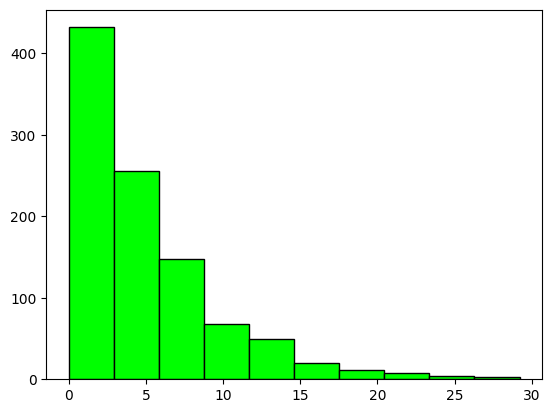

In [4]:
def display_exp_hist(tau,N):
  X = expon_random(tau,N)
  plt.hist(X,color='lime',edgecolor='black')
  plt.show()

display_exp_hist(5,1000)


## Exercise 9.3
Write a program that plots the exponential probability distribution with a fixed parameter t0.

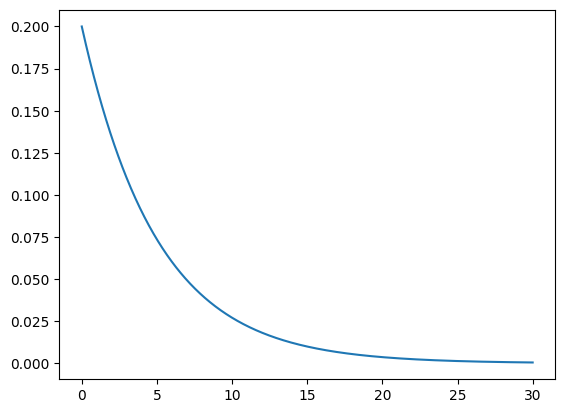

In [14]:
t0 = 5
X = np.linspace(0,t0*6,1000)
Y = 1/t0 * np.exp(-X/t0)
plt.plot(X,Y)
plt.show()


## Exercise 9.4
Write a function likelihood that calculates the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1.

How does the result depend on the number of events in the sample?

In [42]:
def likehood(f,X,tau):
  return np.prod(f(X,tau))

def exponential_pdf(X,tau):
  return 1/tau * np.exp(-X/tau)

for t in range(1,10,1):
  tau = t/10
  X = expon_random(tau,10)
  # print(list(filter(lambda x: x==float(0),X)))
  L = likehood(exponential_pdf,X,tau)
  print(L)

2317359.4995178822
1462.8480873834817
11.133837758563683
3.233644146846342
0.08614726927719377
0.0012038579852273598
0.000402280195622668
6.852031476359824e-06
8.363828737678262e-05


## Exercise 9.4

Write a function loglikelihood that calculates the logarithm of the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1. Remember that the logarithm of the likelihood is defined only when the likelihood is strictly positive.



In [43]:
def loglikehood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

for t in range(1,10,1):
  tau = t/10
  X = expon_random(tau,100)
  # print(list(filter(lambda x: x==float(0),X)))
  L = loglikehood(exponential_pdf,X,tau)
  print(L)

132.8564063395346
66.82391421611263
15.536248709783184
-4.046593494430789
-34.00680591700869
-34.87503117674641
-54.6761055515756
-96.36928044178157
-101.80127651479637


## Exercise 8.6
Study the behavior of the shape of the log-likelihood as a function of the number of events comprising the generated sample.

<ipython-input-66-794dd6ff1b81>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  toys = np.array([expon_random(tau,i) for i in X])


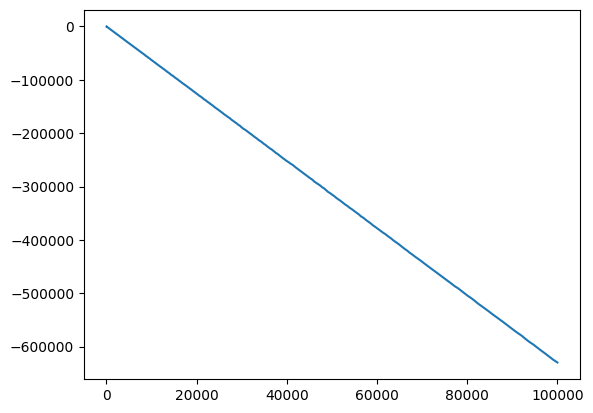

In [66]:
tau = 200 # any tau is allowes, an higher tau shift over the line
X = np.logspace(1,5,1000, dtype=np.int64)
toys = np.array([expon_random(tau,i) for i in X])
Y = np.array([loglikehood(exponential_pdf,i,tau) for i in toys])
plt.plot(X,Y)
plt.show()